# Normalization

- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

- Eliminate the Units (gram, cm, etc)

![](types_of_Normalization.png)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

## Min-Max Normalization

Min-Max Normalization, also known as feature scaling or Min-Max scaling, is a method used in data science to scale and transform the values of a feature (variable) within a specific range, typically between 0 and 1. The purpose is to bring all the values of a feature onto a common scale.

Here's a simple explanation of Min-Max Normalization:

1. **Choose a Range:** Determine the range within which you want to scale your data. The common choice is to scale the data between 0 and 1.

2. **Find the Minimum and Maximum Values:** Identify the minimum (\(min\)) and maximum (\(max\)) values of the feature you want to normalize within the chosen range.

3. **Use the Min-Max Formula:**

![](formula.png)

This formula scales the original values to a range between 0 and 1. It calculates the relative position of an original value within the specified range.

For example, let's say you have a feature with values between 20 and 80, and you want to normalize them between 0 and 1.

- min = 20
- max = 80

If the original value is 40, the normalized value would be calculated as:

![](example.png)

So, the normalized value for the original value 40 in the range 20 to 80 would be 1/3, indicating its relative position within that range.

Min-Max Normalization is a straightforward method that is useful when you want to ensure that your features are on a consistent scale, especially for algorithms that are sensitive to the magnitude of input features.

In [2]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic Acid']

In [3]:
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_13936\2310024543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'], hist=False)


<Axes: xlabel='Alcohol', ylabel='Density'>

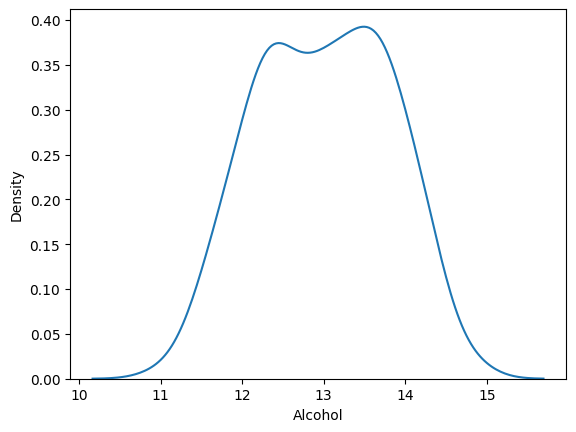

In [4]:
sns.distplot(df['Alcohol'], hist=False)

<Axes: xlabel='Alcohol', ylabel='Density'>

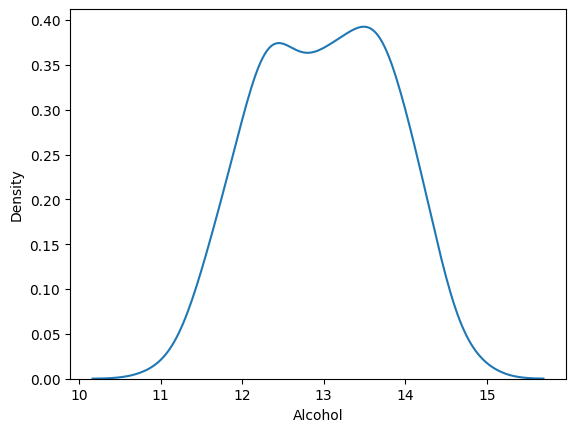

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

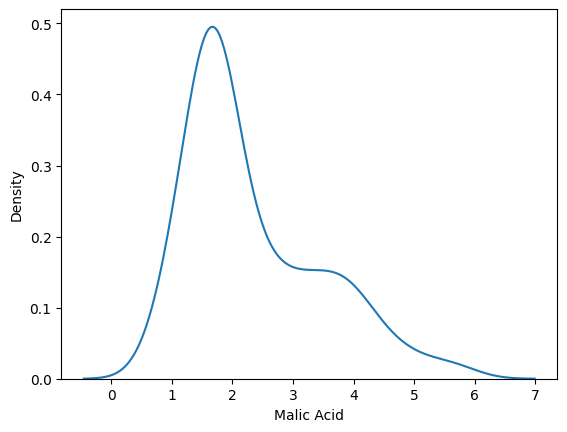

In [6]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

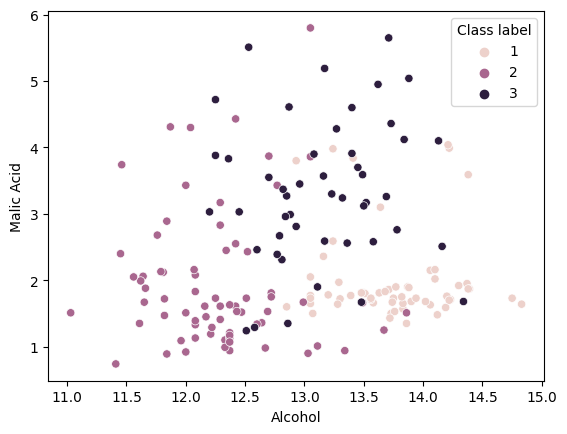

In [7]:
sns.scatterplot(x = df['Alcohol'], y = df['Malic Acid'], hue=df['Class label'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.head(1)

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71


In [10]:
x = df.iloc[:,1:]
y = df['Class label']

In [11]:
X_train, X_test, ytrain, y_test= train_test_split(x,y,test_size=0.3,
                                                 random_state=0)

In [12]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
#fit the scaler to the train set, it will learn the parameter
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
X_train = pd.DataFrame(X_train)
X_train.columns = x.columns

In [16]:
X_test = pd.DataFrame(X_test)
X_test.columns = x.columns

In [18]:
np.round(X_train.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


In [19]:
np.round(X_test.describe())

,Alcohol,Malic Acid
count,54.0,54.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,0.0
max,1.0,1.0


The choice of normalization method depends on the characteristics of your data and the requirements of your machine learning algorithm. Here's a brief overview of when to use each normalization technique:

1. **Min-Max Normalization:**
   - **When to use:** Min-Max Normalization is suitable when your data features have a clear minimum and maximum value, and you want to scale them to a specific range, typically [0, 1]. It is a good choice when you have reason to believe that your data is relatively uniformly distributed across the range.

2. **Mean Normalization:**
   - **When to use:** Mean Normalization is useful when your data has a normal distribution and you want to center it around zero. It subtracts the mean of the feature from each data point and divides by the range. It's often used in scenarios where the mean of the feature is meaningful and should be preserved in the normalization process.

3. **Max Normalization:**
   - **When to use:** Max Normalization is suitable when you want to scale your data based on the maximum value. This is similar to Min-Max Normalization but scales the data based on the maximum value alone. It can be useful when you want to preserve the impact of extreme values.

4. **Robust Normalization:**
   - **When to use:** Robust Normalization is beneficial when dealing with data that contains outliers. Instead of using the mean and standard deviation, it uses the median and interquartile range (IQR). This makes it less sensitive to outliers and is suitable for datasets with skewed di
![](robust_formula.png)stributions.

In summary:
- Use **Min-Max Normalization** for features with a clear minimum and maximum, and you want to scale them to a specific range.
- Use **Mean Normalization** to center your data around zero, especially when the mean of the feature is meaningful.
- Use **Max Normalization** if you want to scale your data based on the maximum value, similar to Min-Max Normalization.
- Use **Robust Normalization** when dealing with data that contains outliers, as it is less sensitive to extreme values compared to methods based on mean and standard deviation.